<a href="https://colab.research.google.com/github/toobask/introtoAI1/blob/main/IntroToAI_701_CourseWork_Amua_et_Tooba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Necessary Libraries & Dependencies

In [8]:
import pandas as pd
import numpy as np

from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import warnings
warnings.filterwarnings('ignore')

## Data Loading, Exploration, & Preprocessing

### Load Data

In [10]:
#load vehicle dataset
#vehicle_df = pd.read_csv("../dataset/vehicle_data.csv")
vehicle_df = pd.read_csv("https://raw.githubusercontent.com/toobask/introtoAI1/main/dataset/vehicle_data.csv")

In [12]:
#check shape of df
vehicle_df.shape
print(f"This dataframe contains {vehicle_df.shape[0]} rows and {vehicle_df.shape[1]} columns.")

This dataframe contains 123971 rows and 19 columns.


In [14]:
#view first 5 rows
vehicle_df[:5]

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
0,Honda Vezel Limited 2017 for sale,"Posted on 01 Sep 2:45 pm, Kurunegala City, Kur...","Rs 12,900,000",Honda,Vezel,Limited,2017,Used,Automatic,SUV / 4x4,Hybrid,"1,500 cc","37,000 km","Kurunegala City, Kurunegala",HONDA VEZEL LIMITEDCBE-XXXXMANU YEAR : 2017LIM...,https://ikman.lk/en/ad/honda-vezel-limited-201...,Prasad Enterprises,Premium-Member,2022-09-01 14:45:00
1,Jaguar XF Fully Loaded 2013 for sale,"Posted on 28 Sep 10:23 am, Kurunegala City, Ku...","Rs 16,250,000",Jaguar,XF,Fully Loaded,2013,Used,Automatic,Saloon,Diesel,"2,200 cc","42,000 km","Kurunegala City, Kurunegala",1st owner(registered owner)Diesel(13-14km per ...,https://ikman.lk/en/ad/jaguar-xf-fully-loaded-...,Dhanushka Dharmasri,Member,2022-09-28 10:23:00
2,Toyota CHR GT New Face 2wd 2020 for sale,"Posted on 16 Sep 1:16 pm, Colombo 7, Colombo","Rs 17,000,000",Toyota,CHR,GT New Face 2wd,2020,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","15,000 km","Colombo 7, Colombo",2020 Facelift modelFirst owner (No previous ow...,https://ikman.lk/en/ad/toyota-chr-gt-new-face-...,Carzone Lanka,Member,2022-09-16 13:16:00
3,Toyota CHR Toyato 2017 for sale,"Posted on 30 Sep 10:12 am, Colombo 7, Colombo","Rs 13,000,000",Toyota,CHR,Toyato,2017,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","21,000 km","Colombo 7, Colombo",Toyota CHR GT Turbo1st owner Imported as a bra...,https://ikman.lk/en/ad/toyota-chr-toyato-2017-...,Carzone Lanka,Member,2022-09-30 10:12:00
4,Toyota Land Cruiser Prado 2015 for sale,"Posted on 30 Sep 9:50 pm, Kelaniya, Gampaha","Rs 33,500,000",Toyota,Land Cruiser Prado,prado,2015,Used,Automatic,SUV / 4x4,Petrol,"2,700 cc","57,000 km","Kelaniya, Gampaha",Toyota Land Cruiser Prado 20152 nd Owner for 5...,https://ikman.lk/en/ad/toyota-land-cruiser-pra...,Shine Music Center,Member,2022-09-30 21:50:00


In [16]:
#display column names
vehicle_df.columns

Index(['Title', 'Sub_title', 'Price', 'Brand', 'Model', 'Edition', 'Year',
       'Condition', 'Transmission', 'Body', 'Fuel', 'Capacity', 'Mileage',
       'Location', 'Description', 'Post_URL', 'Seller_name', 'Seller_type',
       'published_date'],
      dtype='object')

### EDA

Here, we explore individual features.

#### Title & Sub-title

In [20]:
#view content of title and sub title columns
vehicle_df[["Title", "Sub_title"]]

,Title,Sub_title
0,Honda Vezel Limited 2017 for sale,"Posted on 01 Sep 2:45 pm, Kurunegala City, Kur..."
1,Jaguar XF Fully Loaded 2013 for sale,"Posted on 28 Sep 10:23 am, Kurunegala City, Ku..."
2,Toyota CHR GT New Face 2wd 2020 for sale,"Posted on 16 Sep 1:16 pm, Colombo 7, Colombo"
3,Toyota CHR Toyato 2017 for sale,"Posted on 30 Sep 10:12 am, Colombo 7, Colombo"
4,Toyota Land Cruiser Prado 2015 for sale,"Posted on 30 Sep 9:50 pm, Kelaniya, Gampaha"
...,...,...
123966,Honda Insight Ze3 2012,"Posted by Duminda on 2021-11-04 11:41 pm, Ja-Ela"
123967,HINO Dutro 2011 Lorry,"Posted by Areej on 2021-11-04 11:39 pm, Colombo"
123968,TVS King 2017 Three,"Posted by Safan on 2021-11-04 11:38 pm, Colombo"
123969,Toyota Vitz 2018,Posted by Sampath Kodithuwakku on 2021-11-04 1...


#### Brand

In [23]:
#view brand column
vehicle_df.Brand

0          Honda
1         Jaguar
2         Toyota
3         Toyota
4         Toyota
           ...  
123966     Honda
123967      HINO
123968       TVS
123969    Toyota
123970    Suzuki
Name: Brand, Length: 123971, dtype: object

In [25]:
#view unique brands
vehicle_df.Brand.unique()

array(['Honda', 'Jaguar', 'Toyota', 'Mitsubishi', 'Suzuki', 'MG',
       'Peugeot', 'BMW', 'Mercedes Benz', 'Mazda', 'Land Rover',
       'Hyundai', 'Micro', 'Audi', 'Daihatsu', 'Nissan', 'Lexus', 'Kia',
       'Tata', 'Perodua', 'Ford', 'Chery', 'Renault', 'Aston Martin',
       'Chevrolet', 'Other brand', 'Subaru', 'Alfa Romeo', 'Zotye',
       'DFSK', 'Mahindra', 'Skoda', 'Volkswagen', 'Maruti Suzuki', 'Jeep',
       'Ssang Yong', 'Hummer', 'Datsun', 'Tesla', 'Mini', 'Isuzu', 'Fiat',
       'Porsche', 'Morris', 'Austin', 'Opel', 'Daewoo', 'Proton', 'Volvo',
       'Rover', 'Chrysler', 'Maruti', 'Geely', 'Citroen', 'Smart',
       'Moto Guzzi', 'Vauxhall', 'Pontiac', 'SEAT', 'Changan', 'Buick',
       'TVS', 'Hero', 'Mercedes-Benz', 'Bajaj', 'Piaggio', 'Yamaha',
       'Other', 'JAC', 'FAW', 'Ashok-Leyland', 'Komatsu', 'Kubota',
       'Eicher', 'Massey-Ferguson', 'Ranomoto', 'Force', 'Demak',
       'Hero-Honda', 'Sonalika', 'Foton', 'Kinetic', 'Yanmar', 'Kobelco',
       'Loncin', 

In [27]:
#how many brands are there?
print(f"There are {vehicle_df.Brand.nunique()} unique vehicle brands.")

There are 123 unique vehicle brands.


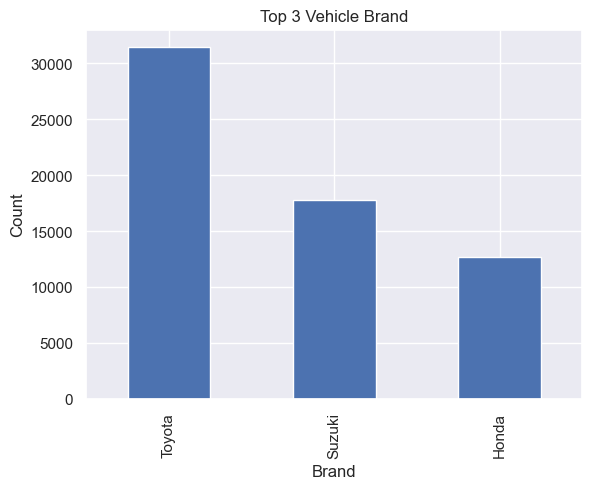

In [29]:
#what are the top 3 brands
top3_brands = vehicle_df.Brand.value_counts().head(3)

#plot top3 brands
top3_brands.plot(kind="bar")
plt.title("Top 3 Vehicle Brand")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()